In [1]:
import os.path
from glob import glob
import ROOT as r
from rootpy.io import root_open
from rootpy.plotting import Hist, Hist2D
from rootpy.tree import Tree
from rootpy import asrootpy
import rootpy.plotting.root2matplotlib as rplt
from root_numpy import root2rec, root2array
rc('text', usetex=True)
# rc('figure.subplot',left=0.1)
# rc('figure.subplot', right=1)
# rc('figure.subplot',bottom=0.1)
# rc('figure.subplot',top=1)
# rc('figure.subplot',wspace=0.2)

#pd.set_option('precision', 1)

labels_count = ['0', 'triggers', '$X_{0}^{-} = e^{-}$', '$X_{0}^{-} 2X^{+}$',
                '$X_{0}^{-} X^{+} X^{-}$', '$X_{0}^{-} 2X^{+} X^{-}$']
labels_eid = ['0', '$X_{0}^{-} 2X^{+} X^{-}$', 'DC same-sector', 'track status',
              '$p > p_{min}$', '$E_{in}>E_{min}$', r'$\frac{E_{EC}}{p} \approx SF$']

In [2]:
def gethists(fnin='/data/jobs/skim.20140102/batch/e1f_skim/38121.root'):
    fin = root_open(fnin)
    # fin = root_open('/data/jobs/skim.20140102/batch/e16_skim/30594.root')
    lb = fin.runquality.lumblocks
    nbins = len(labels_count)-1
    xlo, xhi = -0.5, nbins-0.5
    h = Hist(nbins, xlo, xhi)
    for i, l in enumerate(labels_count[1:]):
        h.xaxis.SetBinLabel(i+1, labels_count[i])
    for b in lb:
        vals = [b.ntrigs, b.nevts_Neg1st, b.nevts_Neg1st_2Pos_exc,
                b.nevts_Neg1st_1Pos1Neg_exc, b.nevts_Neg1st_2Pos1Neg_exc]
        for i, v in enumerate(vals):
            h.Fill(i,v)
    
    ntrigs = h.GetMaximum()
    h.Scale(1.0/ntrigs)
    
    heid2 = fin.eid.heid_1+fin.eid.heid_2+fin.eid.heid_3+fin.eid.heid_4+fin.eid.heid_5+fin.eid.heid_6
    heid = Hist(6,0.5,6.5)
    heid[0], heid[1], heid[2], heid[3], heid[4], heid[5] = heid2[0], heid2[5], heid2[6], heid2[8], heid2[9], heid2[10]
    heid.Scale(1.0/ntrigs)
    return (h, heid)

In [3]:
from matplotlib.patches import PathPatch

hqskim_f, heskim_f = gethists('/data/jobs/skim.20140102/batch/e1f_skim/38121.root')
hqskim_6, heskim_6 = gethists('/data/jobs/skim.20140102/batch/e16_skim/30594.root')

def draw(fig, h, heid, row):
    ax = plt.subplot2grid(shape=(2,5), loc=(row,0), colspan=2)
    lbls = labels_count if row==1 else [_]
    ax.set_xticklabels(lbls)
    for t in ax.xaxis.get_major_ticks():
        t.label.set_rotation(30)
    rplt.hist(h, axes=ax)
    npass = sum(list(h)[2:])
    p = plt.fill_between([1.5,4.5],[npass,npass], [0.01,0.01])
    p.set_facecolors('none')
    for path in p.get_paths():
        p1 = PathPatch(path, fc='none', hatch='\\\\\\', color='blue')
        ax.add_patch(p1)
        p1.set_zorder(p.get_zorder()-0.1)
    ax.set_yscale('log')
    ylim((0.01,3*h.GetMaximum()))
    text(0.9, 0.75,'charge skim', fontsize=12, color='blue',
         transform=ax.transAxes, horizontalalignment='right', verticalalignment='bottom')
    text(0.9, 0.68, '%.1f'%(100*npass)+'$\%$', fontsize=14, color='blue',
         transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
    
    ax = plt.subplot2grid(shape=(2,5), loc=(row,2), colspan=3)
    lbls = labels_eid if row==1 else [_]
    ax.set_xticklabels(lbls)
    for t in ax.xaxis.get_major_ticks():
        t.label.set_rotation(30)
    rplt.hist(heid, axes=ax)
    X = [0.5,6.5]
    Y1 = [npass,npass]
    Y2 = [heid.GetMinimum(), heid.GetMinimum()]
    # plot(X, Y2, 'r-.')
    p = plt.fill_between([0.5,1.5],[npass,npass])
    p.set_facecolors('none')
    for path in p.get_paths():
        p1 = PathPatch(path, fc='none', hatch='\\\\\\', color='blue')
        ax.add_patch(p1)
        p1.set_zorder(p.get_zorder()-0.1)
    p = plt.fill_between([5.5,6.5],Y2)
    p.set_facecolors('none')
    for path in p.get_paths():
        p1 = PathPatch(path, fc='none', hatch='xxx', color='green')
        ax.add_patch(p1)
        p1.set_zorder(p.get_zorder()-0.1)
    ylim((0.5*heid.GetMinimum(),1.1*heid.GetMaximum()))
    text(0.95, 0.75, 'refined electron\nidentification', fontsize=12, color='green',
         transform=ax.transAxes, horizontalalignment='right', verticalalignment='bottom')
    text(0.95, 0.68, '%.1f'%(100*heid.GetMinimum())+'$\%$', fontsize=14, color='green',
         transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
    
    # subplots_adjust(bottom=0.5, wspace=0.6, hspace=0.1)
    subplots_adjust(left=0.1, bottom=0.15, wspace=0.6, hspace=0.1)
    if row==1: # text(0,-0.0025,'selection criteria', fontsize=12)
        text(0.5,0,'selection criteria', fontsize=12, transform=fig.transFigure, horizontalalignment='center')
        text(0, 0.5, 'events per trigger', fontsize=12, transform=fig.transFigure, verticalalignment='center', rotation=90)

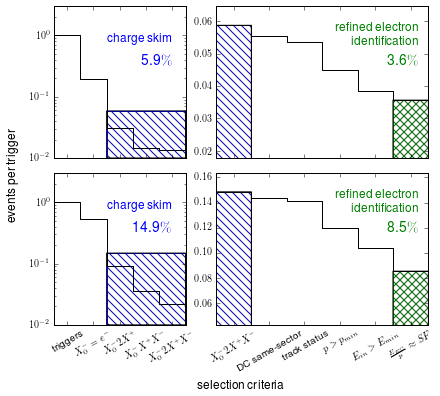

In [5]:
fig = plt.figure(figsize=(6.5,5.9), dpi=1200)
draw(fig, hqskim_f, heskim_f, 0)
draw(fig, hqskim_6, heskim_6, 1)
fig.savefig('skim_count_summary.pdf') #, bbox_inches='tight')

1.23e+08
6.36e+07


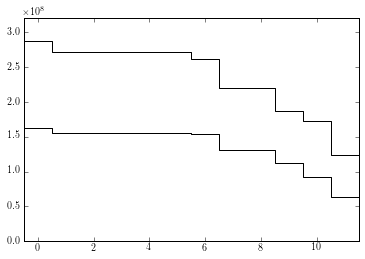

In [13]:
def skimcount(exp='e1f'):
    fnin = '/data/jobs/skim.20140102/skim.%s.hists.root'%exp
    with root_open(fnin) as fin:
        heid2 = fin.eid.heid_1+fin.eid.heid_2+fin.eid.heid_3+fin.eid.heid_4+fin.eid.heid_5+fin.eid.heid_6
        rplt.hist(asrootpy(heid2))
        print('%.2e'%heid2.GetMinimum())
        
skimcount('e1f')
skimcount('e16')